
## Análisis del Parque Vehicular



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import tree
import matplotlib.pyplot as plt



## Carga de datos


In [18]:
df = pd.read_csv('../parque_vehicular_datos_abiertos_13NOV2018.csv', delimiter=';')
print(df.info())


C:\Users\julia\AppData\Local\Temp\ipykernel_29664\1148321451.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../parque_vehicular_datos_abiertos_13NOV2018.csv', delimiter=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451114 entries, 0 to 1451113
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   TIPO_PLACA                1451114 non-null  object 
 1   ANIO_DE_FABRICACION       1450843 non-null  float64
 2   CILINDRADA                1404123 non-null  object 
 3   CANTIDAD_DE_CILINDROS     1237537 non-null  float64
 4   CANTIDAD_DE_PUERTAS       880495 non-null   float64
 5   VALOR_DEL_VEHICULO        1451089 non-null  float64
 6   COLORES                   1450926 non-null  object 
 7   FECHA_DE_IMPORTACION      1231186 non-null  object 
 8   IMP_VALOR_DEL_VEHICULO    1451069 non-null  float64
 9   FECHA_DE_INGRESO          1451114 non-null  object 
 10  ANIO_INGRESO              1451114 non-null  float64
 11  MES_INGRESO               1451114 non-null  float64
 12  CLASE                     1451114 non-null  object 
 13  PERTENENCIA               1


## Preprocesamiento


In [23]:
df['FECHA_DE_IMPORTACION'] = pd.to_datetime(df['FECHA_DE_IMPORTACION'], errors='coerce').dt.year
df['FECHA_DE_INGRESO'] = pd.to_datetime(df['FECHA_DE_INGRESO'], errors='coerce').dt.year

from sklearn.preprocessing import LabelEncoder

# Inicializar el LabelEncoder
labelencoder = LabelEncoder()

# Lista de columnas no numéricas
categorical_columns = ['CILINDRADA', 'COLORES', 'CLASE', 'PERTENENCIA', 'MARCA', 'MODELO', 'DES_CAPACIDAD', 'COMBUSTIBLE', 'ADUANA', 'CONDICION_INGRESO', 'PROPIETARIO_DEPARTAMENTO', 'PROPIETARIO_MUNICIPIO', 'ESTADO']

# Convertir todas las columnas no numéricas a tipo string antes de la codificación
for column in categorical_columns:
    df[column] = df[column].astype(str)
    df[column] = labelencoder.fit_transform(df[column])


### Selección de características y variable objetivo



In [24]:
X = df.drop('VALOR_DEL_VEHICULO', axis=1)
y = df['VALOR_DEL_VEHICULO']


### Selección de características y variable objetivo



In [25]:
X = df.drop('VALOR_DEL_VEHICULO', axis=1)
y = df['VALOR_DEL_VEHICULO']

### División de los datos en conjuntos de entrenamiento y prueba

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Creación y entrenamiento del modelo de árbol de decisión

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))

# Entrenar el modelo con los valores imputados
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train_imputed.ravel())


DecisionTreeRegressor(max_depth=5, random_state=42)

### Evaluación del modelo

In [31]:
# Eliminar filas con valores NaN en X_test e y_test
X_test = X_test.dropna()
y_test = y_test[y_test.index.isin(X_test.index)]

# Predecir utilizando el modelo entrenado
y_pred = dt_regressor.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 168615327.66050187
Mean Absolute Error: 1293.745880832733


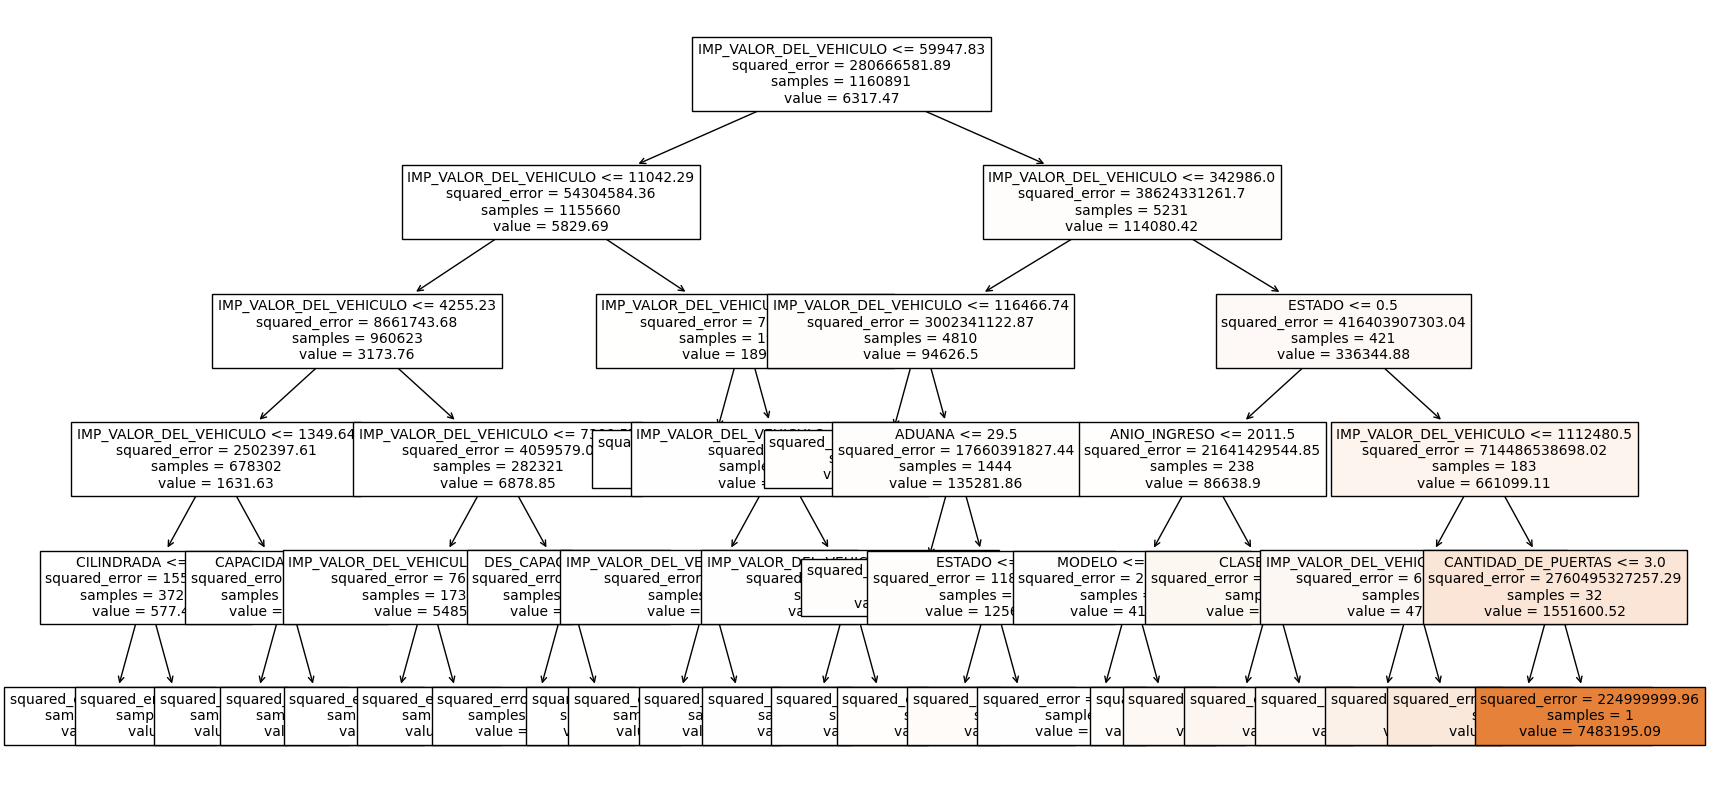

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(dt_regressor, 
          feature_names=X_train.columns.tolist(),
          filled=True, 
          precision=2, 
          fontsize=10)

plt.show()
